# Pandas FIRE_DATA

## Import library Pandas

In [1]:
import pandas as pd

## ดาวน์โหลดข้อมูลจาก Github

In [2]:
FIRE_DATA = pd.read_excel('https://github.com/WITSANUKHA/GEOS_DATA_SCI_ANAL/blob/master/Fire_Data.xlsx?raw=true')

## ดูประเภทข้อมูล

In [3]:
FIRE_DATA.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

## ดูข้อมูลทั้งหมด

In [4]:
FIRE_DATA

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


## Import library numpy

In [5]:
import numpy as np

## Import library datetime

In [6]:
import datetime

## แปลง ACQ_DATE จาก datetime64[ns] เป็น int64 นำไปไว้ที่ column ACQ_DATE_INT ได้หน่วย นาโนวินาที

In [7]:
FIRE_DATA['ACQ_DATE_INT'] = pd.to_datetime(FIRE_DATA['ACQ_DATE']).astype(np.int64)
FIRE_DATA['ACQ_DATE_INT']

0        1575158400000000000
1        1575158400000000000
2        1575158400000000000
3        1575158400000000000
4        1575158400000000000
                ...         
79229    1585958400000000000
79230    1585958400000000000
79231    1585958400000000000
79232    1585958400000000000
79233    1585958400000000000
Name: ACQ_DATE_INT, Length: 79234, dtype: int64

## แยกจำนวนชั่วโมงออกมาจาก ACQ_TIME นำไปไว้ที่ column ACQ_TIME_HOUR

In [8]:
FIRE_DATA['ACQ_TIME_HOUR'] = pd.to_datetime(FIRE_DATA['ACQ_TIME']//100).astype(np.int64)

## แยกจำนวนนาทีออกมาจาก ACQ_TIME ินำไปไว้ที่ column ACQ_TIME_MIN

In [9]:
FIRE_DATA['ACQ_TIME_MIN'] = pd.to_datetime(FIRE_DATA['ACQ_TIME']%100).astype(np.int64)

## รวมเวลาทั้งหมดในหน่วย นาโนวินาที

In [10]:
FIRE_DATA['ACQ_DATETIME'] = pd.to_datetime(FIRE_DATA['ACQ_DATE_INT']+(FIRE_DATA['ACQ_TIME_HOUR']*3600e9)+(FIRE_DATA['ACQ_TIME_MIN']*60e9)).astype(np.int64)

In [11]:
FIRE_DATA['ACQ_DATETIME_plot'] = pd.to_datetime(FIRE_DATA.ACQ_DATETIME)
FIRE_DATA

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,ACQ_DATE_INT,ACQ_TIME_HOUR,ACQ_TIME_MIN,ACQ_DATETIME,ACQ_DATETIME_plot
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0,1585958400000000000,20,3,1586030580000000000,2020-04-04 20:03:00
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0,1585958400000000000,20,3,1586030580000000000,2020-04-04 20:03:00
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0,1585958400000000000,20,3,1586030580000000000,2020-04-04 20:03:00
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0,1585958400000000000,20,3,1586030580000000000,2020-04-04 20:03:00


## แปลงเวลาให้อยู่ในหน่วยนาทีและวัน โดยลบค่า นาโนวินาที เริ่มต้นออกไป

In [12]:
FIRE_DATA['Total_MIN'] = pd.to_datetime(((FIRE_DATA['ACQ_DATETIME']-1575158400000000000)/(60e9))).astype(np.int64)
FIRE_DATA['Total_DAY'] = pd.to_datetime(((FIRE_DATA['ACQ_DATETIME']-1575158400000000000)/(60e9))/60/24).astype(np.int64)

## ค้นหาจำนวนวันที่ 1 ถึง 5 (เรียกค่า 0-4)

In [13]:
pivot = FIRE_DATA.loc[FIRE_DATA['Total_DAY']<=4].copy()
pivot

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,...,BRIGHT_TI5,FRP,TYPE,ACQ_DATE_INT,ACQ_TIME_HOUR,ACQ_TIME_MIN,ACQ_DATETIME,ACQ_DATETIME_plot,Total_MIN,Total_DAY
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,...,303.4,5.8,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,306.3,6.4,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,...,305.0,3.8,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,306.0,4.6,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,...,303.9,3.1,0,1575158400000000000,6,35,1575182100000000000,2019-12-01 06:35:00,395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,18.52934,98.95547,329.5,0.44,0.46,2019-12-05,701,N,VIIRS,...,298.2,2.9,0,1575504000000000000,7,1,1575529260000000000,2019-12-05 07:01:00,6181,4
396,397,19.67583,100.26594,335.0,0.55,0.51,2019-12-05,701,N,VIIRS,...,299.0,5.4,0,1575504000000000000,7,1,1575529260000000000,2019-12-05 07:01:00,6181,4
397,398,19.52020,100.11665,299.9,0.32,0.55,2019-12-05,1931,N,VIIRS,...,284.8,0.3,0,1575504000000000000,19,31,1575574260000000000,2019-12-05 19:31:00,6931,4
398,399,19.51522,100.11551,322.8,0.32,0.55,2019-12-05,1931,N,VIIRS,...,285.5,1.1,0,1575504000000000000,19,31,1575574260000000000,2019-12-05 19:31:00,6931,4


## Import library Matplotlib

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## กำหนดขอบเขตและขนาดกราฟ

In [15]:
plt.rcParams['figure.figsize']=(9,9)
plt.rcParams['figure.dpi']=150

## plot

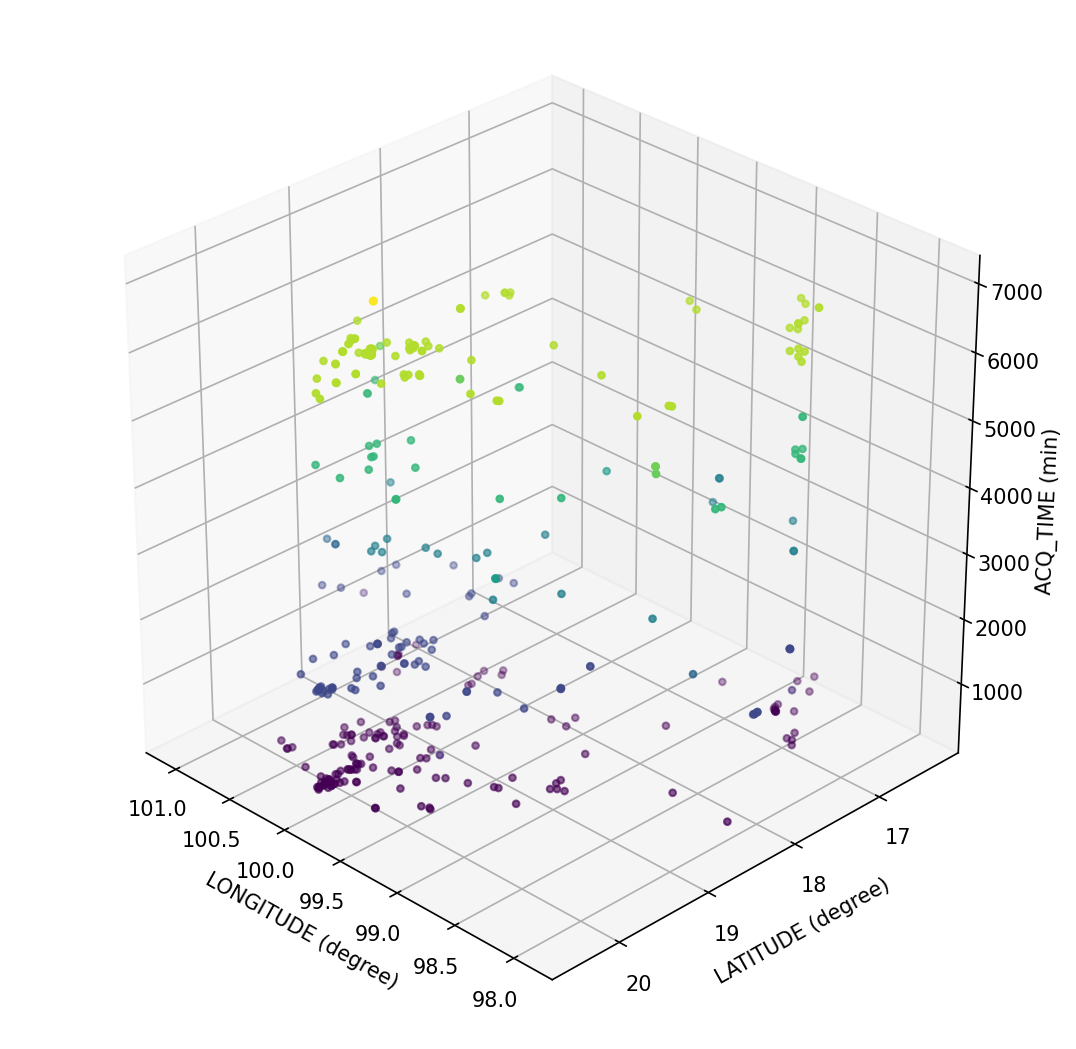

In [16]:
plot3d = plt.figure().gca(projection='3d')
plot3d.scatter(pivot.LONGITUDE,pivot.LATITUDE,pivot.Total_MIN,s=10,c=pivot.Total_MIN) #ขนาดจุด 10 และสีตาม pivot.Total_MIN
plot3d.set_xlabel('LONGITUDE (degree)')
plot3d.set_ylabel('LATITUDE (degree)')
plot3d.set_zlabel('ACQ_TIME (min)')
plot3d.view_init(azim=135) #แสดงกราฟที่มุม 135 องศา
plt.show()